In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
df[df["Taxable.Income"]<=30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [9]:
gns=['Risky','Good']
df['Fraudcheck']=pd.cut(df['Taxable.Income']
                        ,bins=[0,30000,100000],labels=gns)

In [6]:
for i in range (0,len(df['Taxable.Income'])):
    if df['Taxable.Income'][i]<=30000:
        df['Fraudcheck'][i]='Risky'
    else:
        df['Fraudcheck'][i]='Good'

In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [10]:
df['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [11]:
df['Fraudcheck'].value_counts()

Good     476
Risky    124
Name: Fraudcheck, dtype: int64

In [13]:
df.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,NO,Single,68833,50047,10,YES,Good


In [18]:
df['Fraudcheck']=df["Fraudcheck"].replace(['Risky','Good'],[0,1])
df['Urban']=df['Urban'].replace(['YES','NO'],[1,0])
df['Undergrad']=df["Undergrad"].replace(['YES','NO'],[1,0])
df['Marital.Status']=df["Marital.Status"].replace(['Single','Divorced','Married'],[0,1,2])

In [19]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,0,0,68833,50047,10,1,1
1,1,1,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,0,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,1,76340,39492,7,1,1
596,1,1,69967,55369,2,1,1
597,0,1,47334,154058,0,1,1
598,1,2,98592,180083,17,0,1


In [20]:
df['Fraudcheck'].value_counts()

1    476
0    124
Name: Fraudcheck, dtype: int64

In [21]:
df['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [22]:
df['Marital.Status'].value_counts()

0    217
2    194
1    189
Name: Marital.Status, dtype: int64

# SPLITTING THE DATA

In [23]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Fraudcheck'],
      dtype='object')

In [24]:
df1=df[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban','Fraudcheck']]

In [26]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,0,0,68833,50047,10,1,1
1,1,1,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,0,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1


In [27]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [29]:
X.head()


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,1,134075,18,1
2,0,2,160205,30,1
3,1,0,193264,15,1
4,0,2,27533,28,0


In [30]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Fraudcheck, dtype: category
Categories (2, int64): [0 < 1]

In [32]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Fraudcheck'],
      dtype='object')

# SPLITTING DATA INTO TRAIN AND TEST DATA

In [90]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=11)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [91]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
173,1,0,105110,16,1
240,0,0,139146,30,1
214,0,1,140159,16,0
522,0,1,103343,10,0
425,1,1,121506,27,0
...,...,...,...,...,...
332,1,1,84132,1,0
269,1,2,125450,13,1
337,1,2,73490,7,0
91,1,2,73733,10,1


In [92]:
y_train

173    1
240    1
214    1
522    1
425    1
      ..
332    1
269    1
337    0
91     1
80     1
Name: Fraudcheck, Length: 480, dtype: category
Categories (2, int64): [0 < 1]

# BUILDING (DT) CLASSIFIER USING GINI CRITERIA

In [93]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [94]:
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    95
0    25
dtype: int64

In [95]:
from sklearn import metrics
metrics.accuracy_score(pred,y_test)

0.65

In [96]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.20      0.19      0.19        27
           1       0.77      0.78      0.78        93

    accuracy                           0.65       120
   macro avg       0.48      0.49      0.48       120
weighted avg       0.64      0.65      0.65       120



In [97]:
model.feature_importances_

array([0.01109996, 0.07470909, 0.67886628, 0.19807583, 0.03724883])

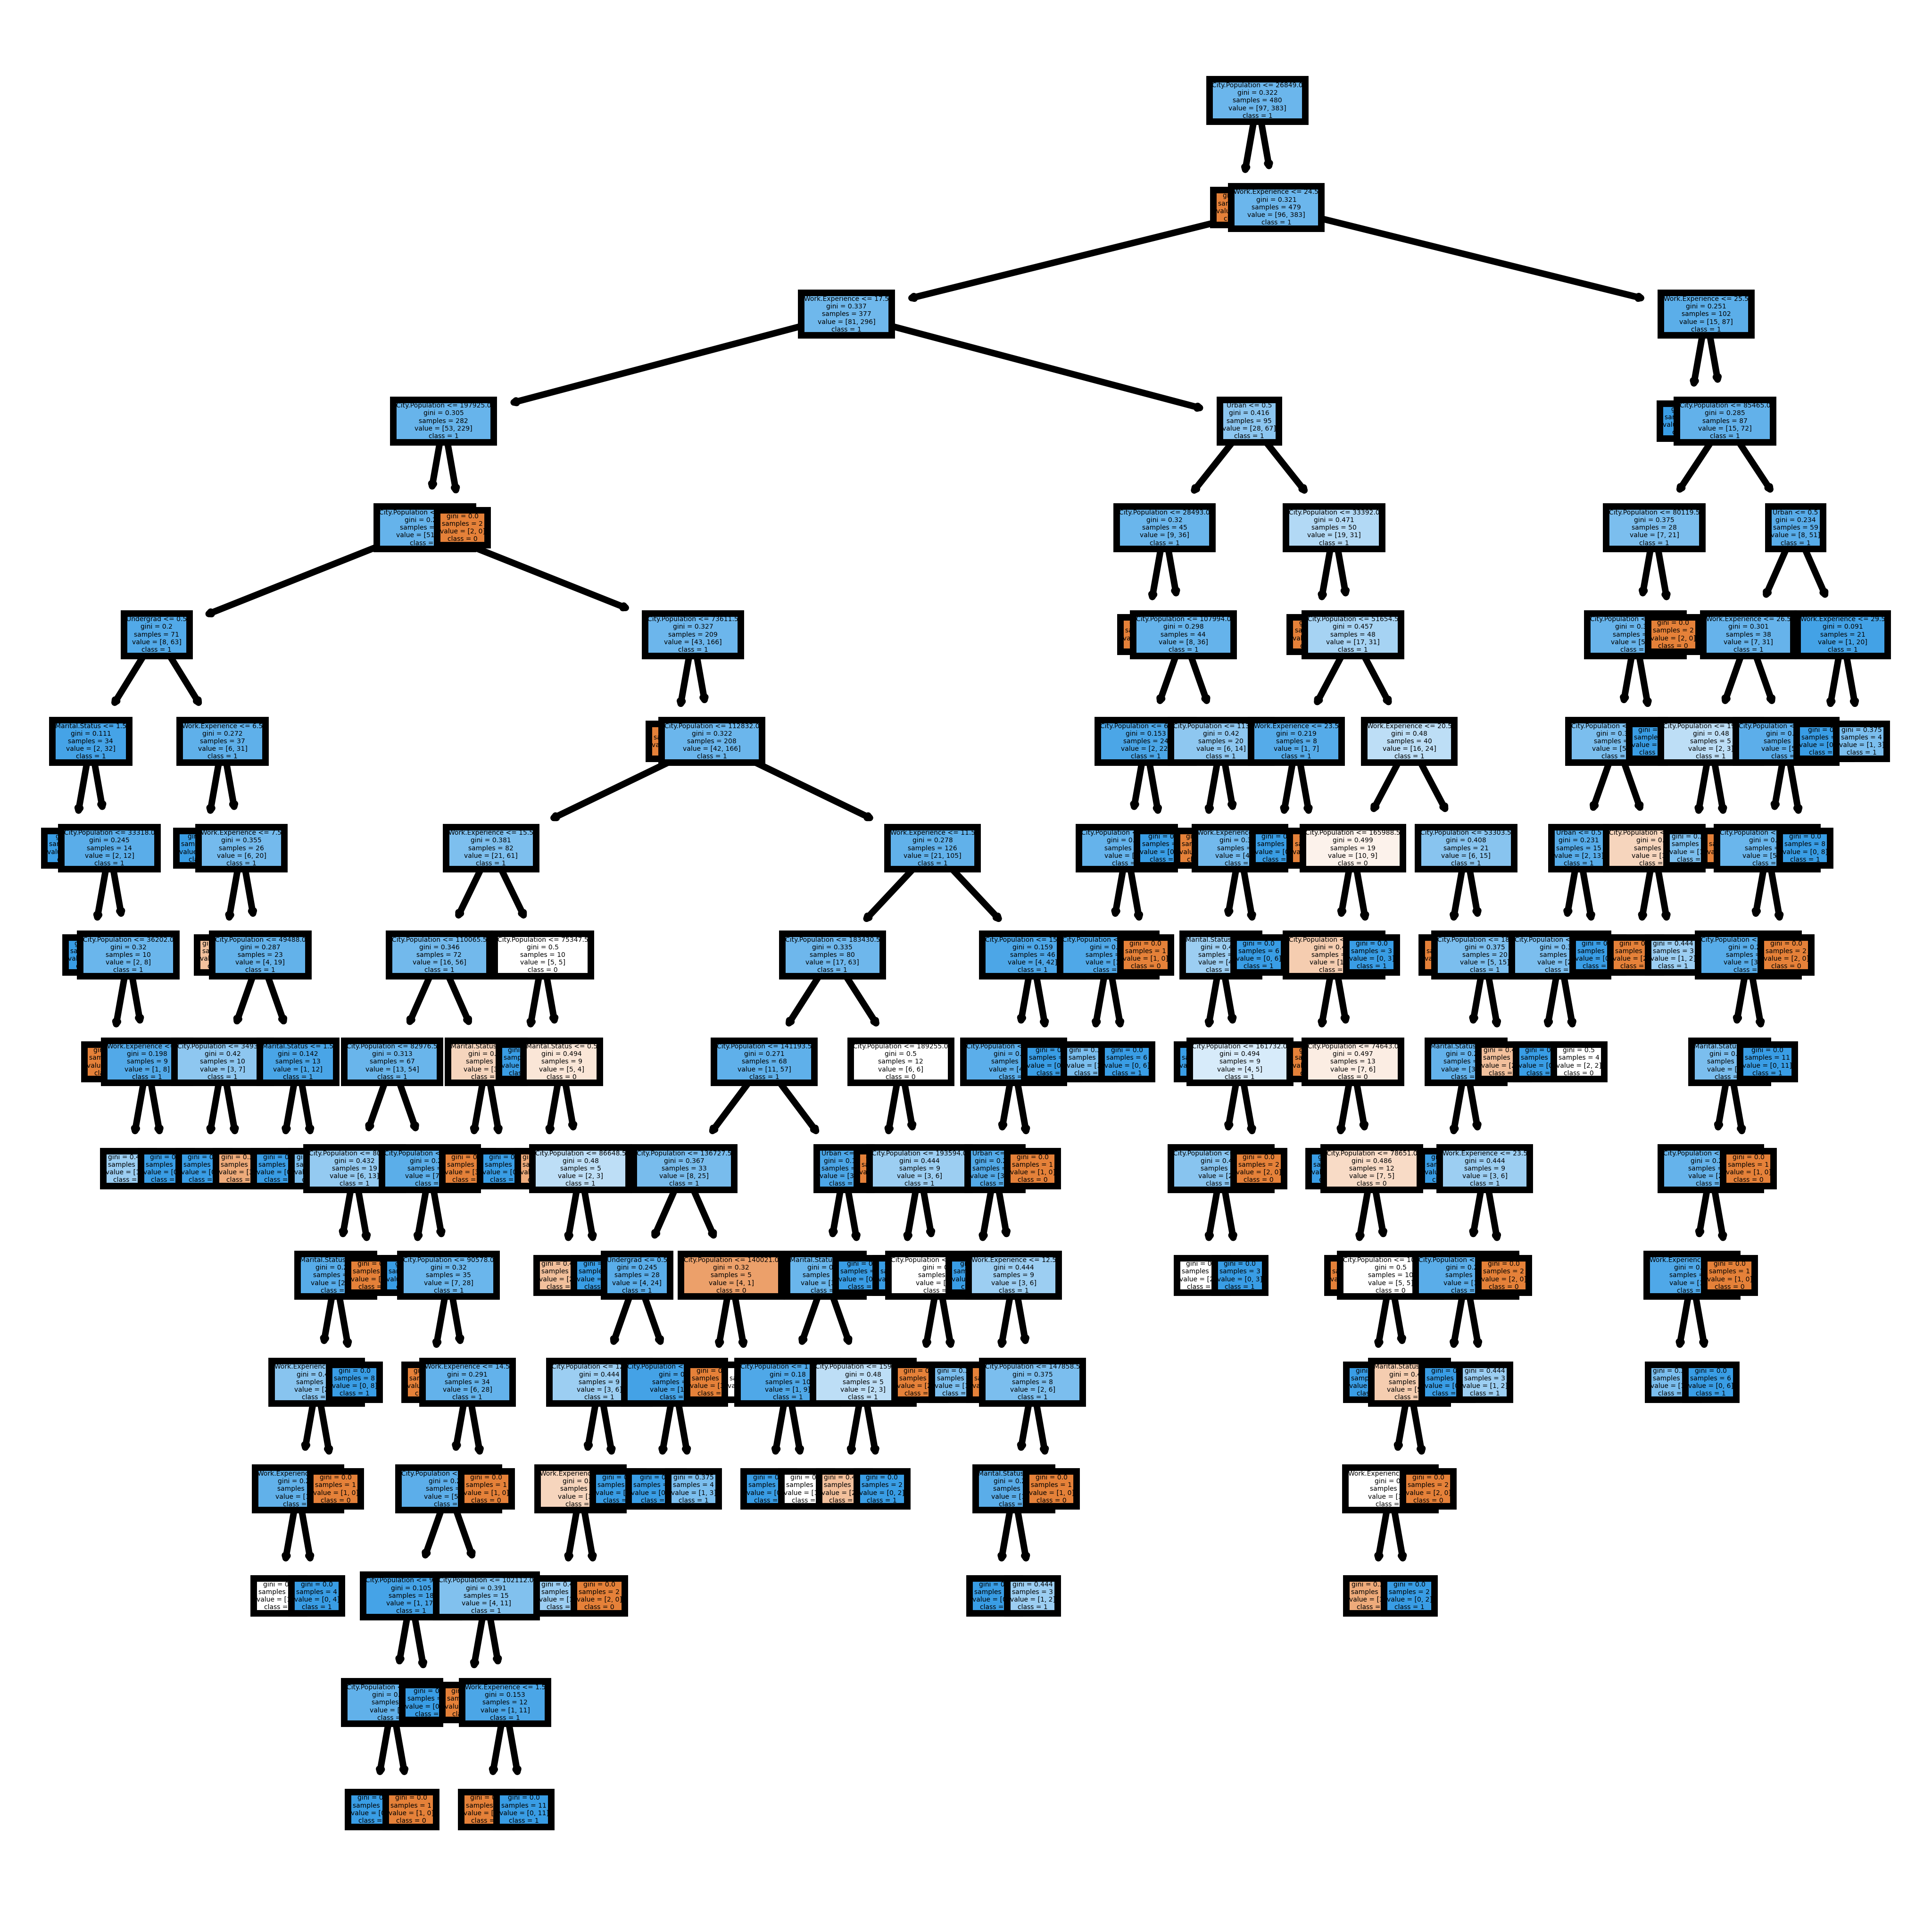

In [98]:
fe=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
ta=['0','1']
fig,axes=plt.subplots(figsize=(5,5),dpi=1000)
tree.plot_tree(model,feature_names=fe,class_names=ta,filled=True)
plt.show()

# BUILDING DECISION TREE CLASSIFIER(CART) USING ENTROPY CRITERIA

In [99]:
model2=DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [100]:
preds=model2.predict(x_test)
pd.Series(preds).value_counts()

1    94
0    26
dtype: int64

In [101]:
preds=model2.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.625

In [102]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.15      0.15      0.15        27
           1       0.76      0.76      0.76        93

    accuracy                           0.62       120
   macro avg       0.45      0.46      0.46       120
weighted avg       0.62      0.62      0.62       120



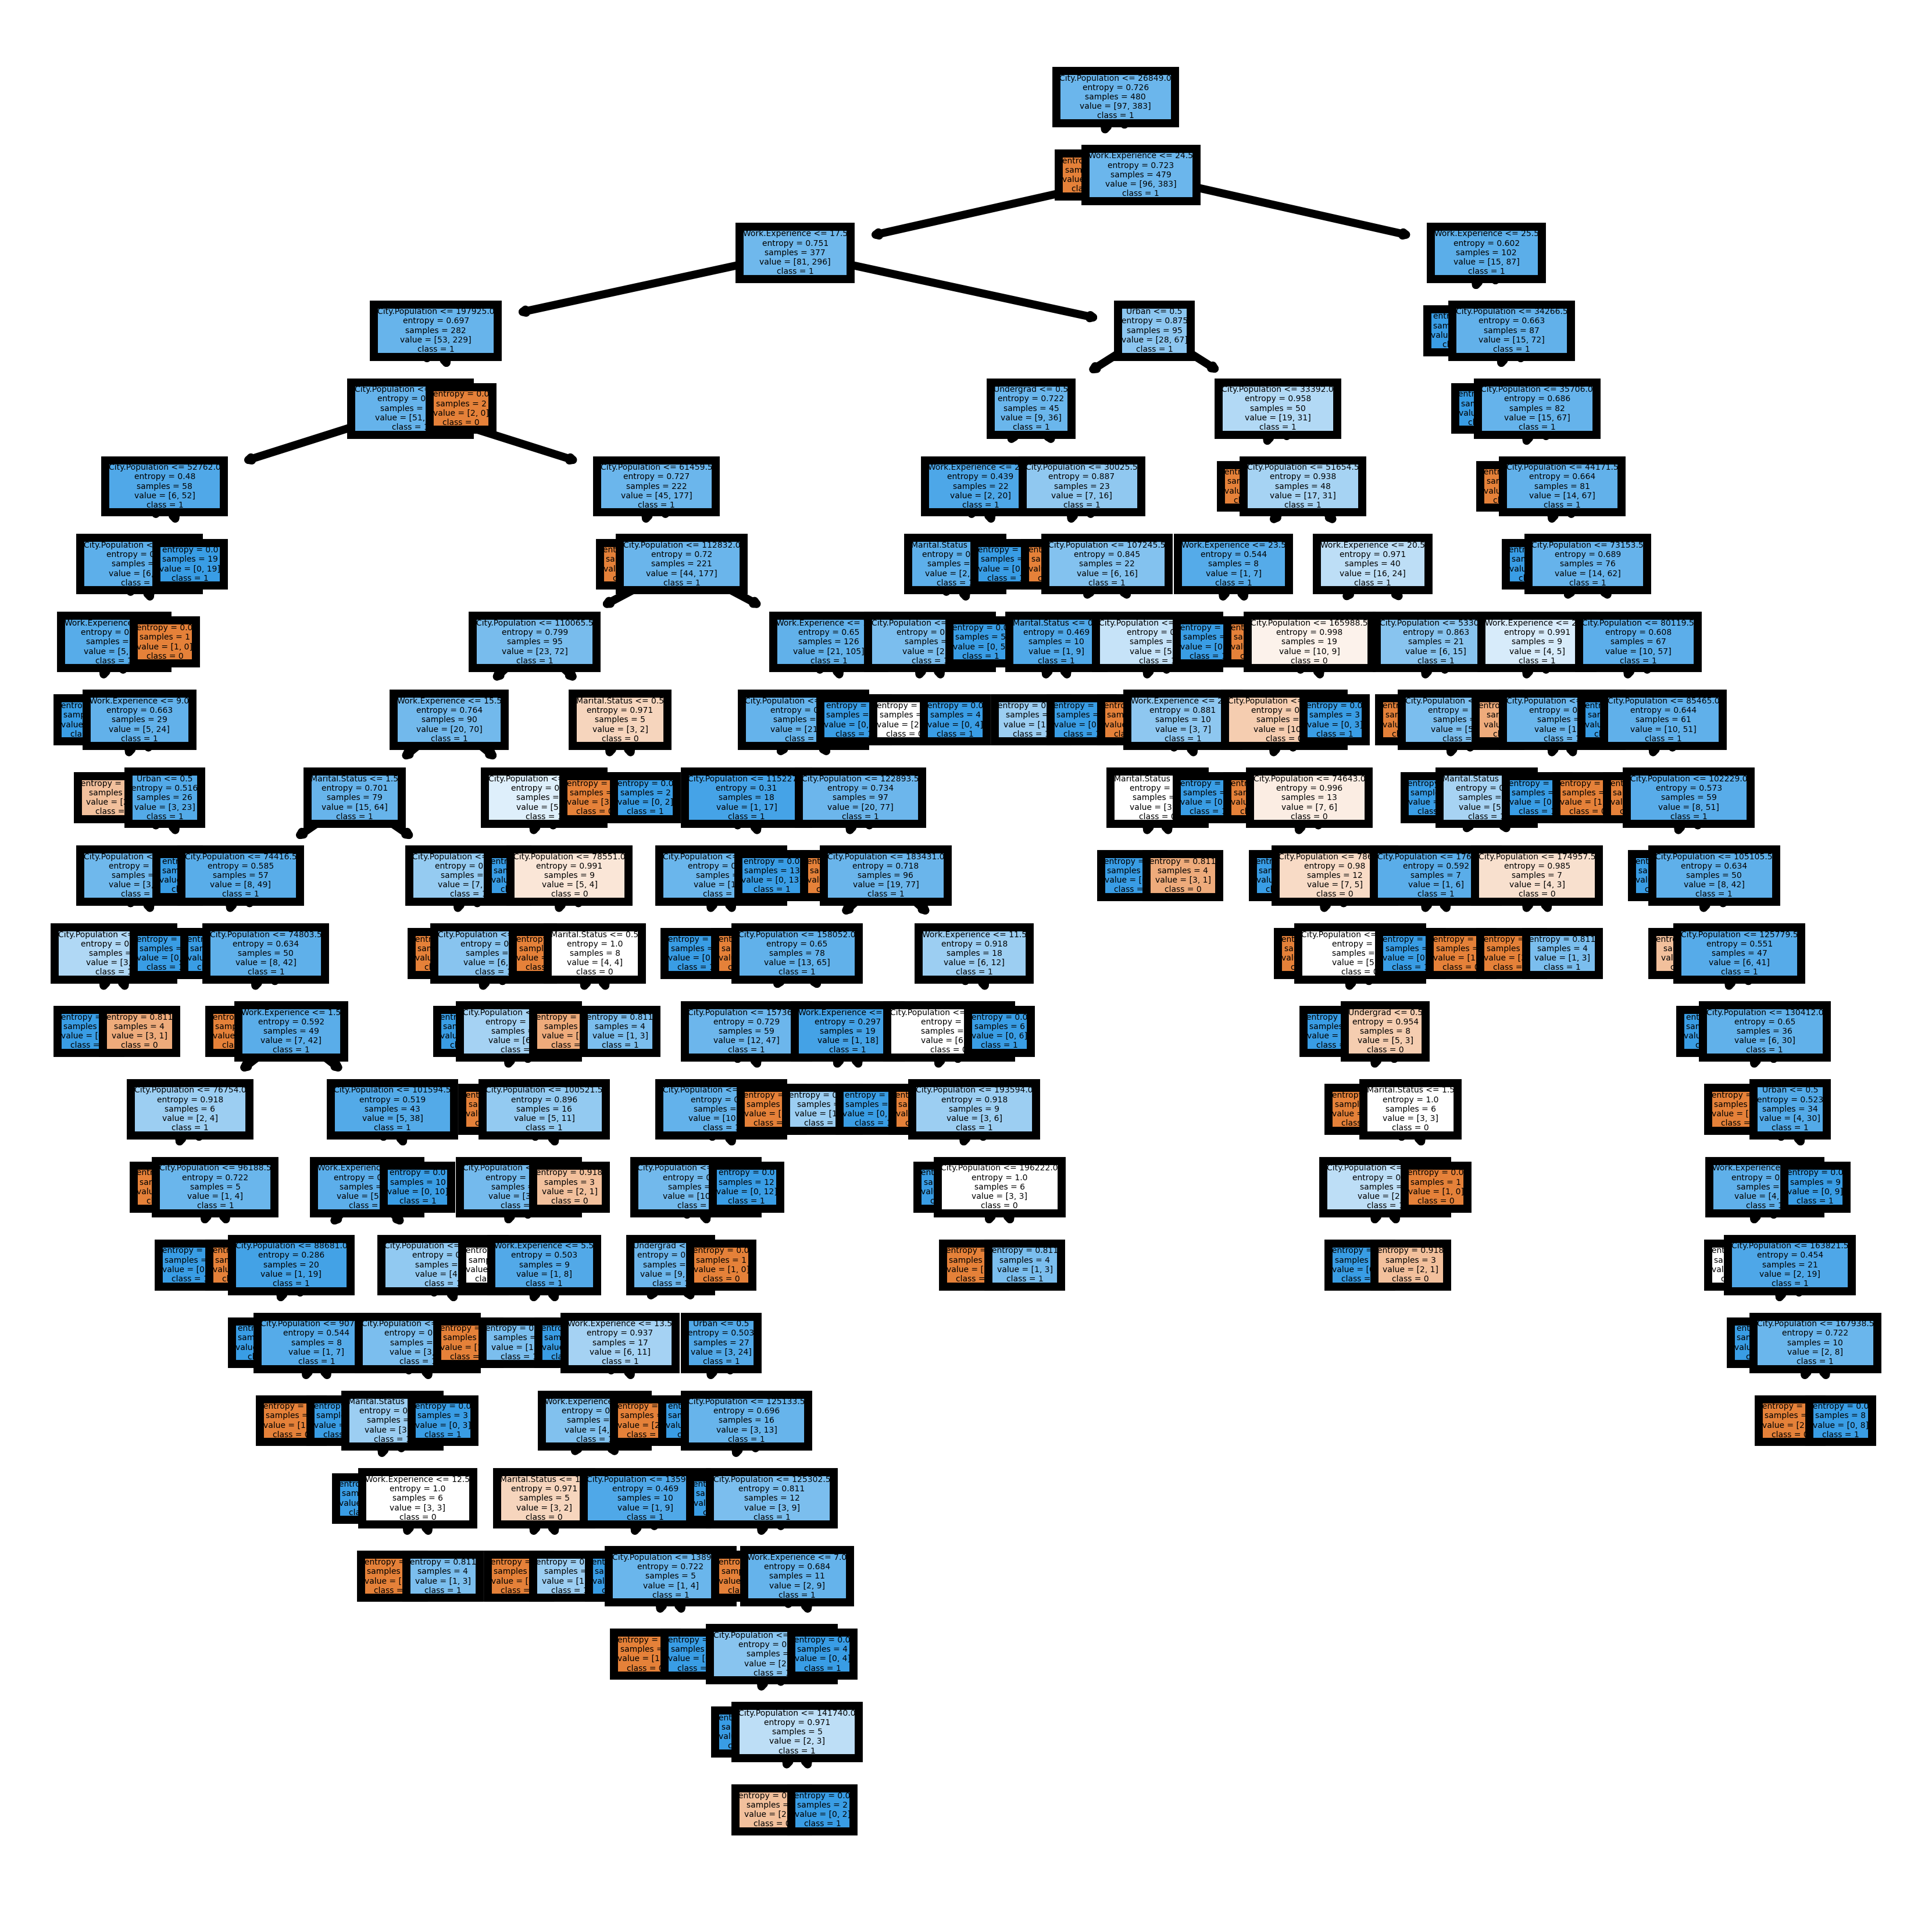

In [103]:
fe1=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
ta1=['0','1']
fig,axes=plt.subplots(figsize=(4,4),dpi=1000)
tree.plot_tree(model2,feature_names=fe1,class_names=ta1,filled=True);
plt.show()